In [2]:
import requests
from bs4 import BeautifulSoup
import time
search_query = input("Enter the product to search on Snapdeal: ").strip()
num_pages = 2  
base_url = "https://www.snapdeal.com/search"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

product_list = []

for page in range(1, num_pages + 1):
    print(f"\nScraping page {page} for '{search_query}'...")
    params = {"keyword": search_query, "page": page}
    response = requests.get(base_url, params=params, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="product-tuple-listing")

    for product in products:
        title = product.find("p", class_="product-title").text.strip() if product.find("p", class_="product-title") else "N/A"
        price = product.find("span", class_="product-price").text.strip() if product.find("span", class_="product-price") else "N/A"
        discount = product.find("div", class_="product-discount").text.strip() if product.find("div", class_="product-discount") else "N/A"
        rating_tag = product.find("div", class_="filled-stars")
        if rating_tag:
            rating_style = rating_tag.get("style", "")
            try:
                percent = float(rating_style.replace("width:", "").replace("%", "").replace(";", "").strip())
                rating_value = round(percent / 20, 1)  
            except ValueError:
                rating_value = "N/A"
        else:
            rating_value = "N/A"

        product_list.append({
            "Title": title,
            "Price": price,
            "Discount": discount,
            "Rating": rating_value
        })
    
    time.sleep(1)
if not product_list:
    print("\nNo products found. Try another search term.")
else:
    print(f"\nFound {len(product_list)} products for '{search_query}'\n")
    
    for i, item in enumerate(product_list, 1):
        print(f"{i}. Title: {item['Title']}")
        print(f"   Price: {item['Price']}")
        print(f"   Discount: {item['Discount']}")
        print(f"   Rating: {item['Rating']}")
        print("-" * 60)


Enter the product to search on Snapdeal: iphone

Scraping page 1 for 'iphone'...

Scraping page 2 for 'iphone'...

Found 40 products for 'iphone'

1. Title: Hybite Premium Selfie Stick, Blue tooth Extendable Selfie Stick Tri pod with Led Light Wireless Remote and Portable Tri pod Stand Compatible for All iPhone and Android Smartphone
   Price: Rs.  292
   Discount: 71% Off
   Rating: 4.1
------------------------------------------------------------
2. Title: PD 20W Power Delivery Original Fast Charger with USB-C to Lightning Cable for iPhone 14/14Plus/14Pro/14Pro max 13/13Pro/13Pro max 12/12Pro/12/11/X/Xr Series
   Price: Rs.  513
   Discount: 83% Off
   Rating: 3.7
------------------------------------------------------------
3. Title: Hybite Premium Selfie Stick, Blue tooth Extendable Selfie Stick Tri pod with Led Light Wireless Remote and Portable Tri pod Stand Compatible for All iPhone and Android Smartphone
   Price: Rs.  265
   Discount: 73% Off
   Rating: 4.0
---------------------

Enter product to search on Snapdeal: iphone

Top 20 results for 'iphone':

Case Vault Covers Silicon Soft cases Compatible For Silicon Iphone 14 pro Max ( Pack of 1 )
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers Transparent Soft Silicon Cases For iPhone 13 -
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers Silicon Soft cases Compatible For Silicon Apple iPhone 15 Pro Max ( Pack of 1 )
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers Silicon Soft cases Compatible For Silicon iPhone 13 ( Pack of 1 )
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers - Transparent Silicon Silicon Soft cases Compatible For Apple iPhone 11 ( Pack of 1 )
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers Silicon Soft cases Compatible For Silicon Apple iPhone 15 Plus ( Pack of 1 )
Price: Rs.  174 | Discount: 65% Off | Rating: No rating

Case Vault Covers Silicon Soft cases Compatib

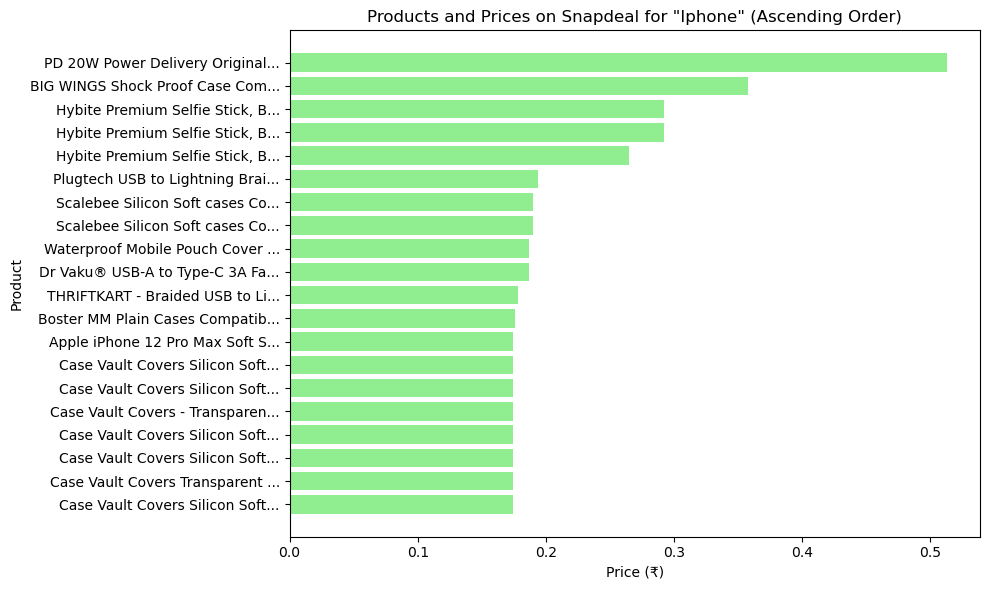

In [4]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

def convert_price_to_float(price):
    price = re.sub(r'[^\d.]', '', price)
    return float(price) if price else 0.0

def get_snapdeal_products(search_query):
    base_url = 'https://www.snapdeal.com/search'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
    }

    params = {'keyword': search_query.replace(' ', '+')}
    response = requests.get(base_url, headers=headers, params=params)

    products_data = []

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Each product block
        products = soup.find_all('div', class_='product-tuple-listing')
        
        for product in products:
            # Title
            title_tag = product.find('p', class_='product-title')
            title = title_tag.text.strip() if title_tag else "N/A"

            # Price
            price_tag = product.find('span', class_='lfloat product-price')
            price = price_tag.text.strip() if price_tag else "0"

            # Discount
            discount_tag = product.find('div', class_='product-discount')
            discount = discount_tag.text.strip() if discount_tag else "No discount"

            # Rating (stars)
            rating_tag = product.find('div', class_='filled-stars')
            if rating_tag and 'style' in rating_tag.attrs:
                # Extract width percentage (like style="width:80%")
                style = rating_tag['style']
                match = re.search(r'width:(\d+)%', style)
                rating = f"{int(match.group(1)) / 20:.1f} / 5" if match else "No rating"
            else:
                rating = "No rating"

            products_data.append({
                'Product': title,
                'Price': price,
                'Discount': discount,
                'Rating': rating
            })

    return sorted(products_data, key=lambda x: convert_price_to_float(x['Price']))

# -----------------------------
# MAIN PROGRAM
# -----------------------------
search_query = input('Enter product to search on Snapdeal: ')
products = get_snapdeal_products(search_query)

if products:
    print(f"\nTop {len(products)} results for '{search_query}':\n")
    for p in products:  # show first 10 results
        print(f"{p['Product']}\nPrice: {p['Price']} | Discount: {p['Discount']} | Rating: {p['Rating']}\n")

    # Plot chart
    product_names = [p['Product'][:30] + "..." if len(p['Product']) > 30 else p['Product'] for p in products]
    product_prices = [convert_price_to_float(p['Price']) for p in products]

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(product_prices)), product_prices, color='lightgreen')
    plt.xlabel('Price (₹)')
    plt.ylabel('Product')
    plt.title(f'Products and Prices on Snapdeal for "{search_query.capitalize()}" (Ascending Order)')
    plt.yticks(range(len(product_prices)), product_names)
    plt.tight_layout()
    plt.show()

else:
    print("No products found on Snapdeal.")
